Importamos las librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos el archivo del drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df_trafico = pd.read_excel("/content/drive/MyDrive/Matemáticas y Ciencias de Datos para la toma de decisiones/Accidentalidad.xlsx")
df_trafico

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,NaN,443359.226,4472082.272,N,NaN
1,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,443359.226,4472082.272,N,NaN
2,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,NaN,441155.351,4474129.588,S,NaN
3,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,NaN,441155.351,4474129.588,N,NaN
4,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,441155.351,4474129.588,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59236,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,442561.327,4471590.750,N,NaN
59237,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,442561.327,4471590.750,N,NaN
59238,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,442561.327,4471590.750,N,NaN
59239,2023S014588,2023-03-17,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,441499.788,4478869.639,N,NaN


Identificamos datos NaN o no válidos o valores nulos

In [ ]:
df_trafico.isna().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      1
cod_distrito                1
distrito                    1
tipo_accidente              0
estado_meteorológico     6705
tipo_vehiculo             296
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad           28068
lesividad               28068
coordenada_x_utm           12
coordenada_y_utm           12
positiva_alcohol          274
positiva_droga          59051
dtype: int64

In [ ]:
df_trafico["estado_meteorológico"].isna().sum()

6705

In [ ]:
# Mostrar los valores nulos para cada campo
df_trafico["estado_meteorológico"][df_trafico["estado_meteorológico"].isna()]

2        NaN
3        NaN
4        NaN
14       NaN
51       NaN
        ... 
59231    NaN
59232    NaN
59233    NaN
59234    NaN
59235    NaN
Name: estado_meteorológico, Length: 6705, dtype: object

Crear una gráfica de barras

In [ ]:
conteo_sexo = df_trafico["sexo"].value_counts()
print(conteo_sexo)

Hombre         35826
Mujer          17130
Desconocido     6285
Name: sexo, dtype: int64


In [ ]:
df_trafico["sexo"] = df_trafico["sexo"].replace("Desconocido","Prefiere no contestar")
conteo_sexo = df_trafico["sexo"].value_counts()
print(conteo_sexo)

Hombre                   35826
Mujer                    17130
Prefiere no contestar     6285
Name: sexo, dtype: int64


Text(0.5, 1.0, 'Sexo de las personas que tuvieron un accidente')

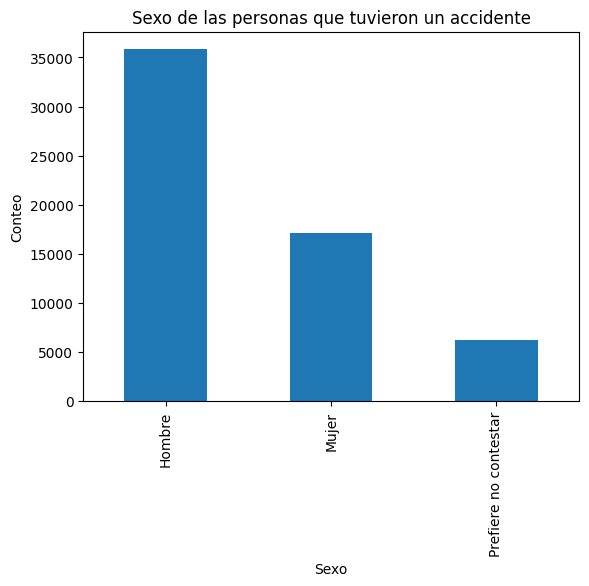

In [ ]:
conteo_sexo.plot(kind="bar")
plt.xlabel("Sexo")
plt.ylabel("Conteo")
plt.title("Sexo de las personas que tuvieron un accidente")

Estadística básica para datos cuantitativos

In [ ]:
print(df_trafico["cod_distrito"].mean())

9.886242403781228


In [ ]:
print(df_trafico["cod_distrito"].median())

10.0


In [ ]:
print("Valor máximo:" ,df_trafico["cod_distrito"].max())
print("Valor mínimo:" ,df_trafico["cod_distrito"].min())
rango = df_trafico["cod_distrito"].max() - df_trafico["cod_distrito"].min()
print("Rango: ",rango)

Valor máximo: 21.0
Valor mínimo: 1.0
Rango:  20.0
